In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
#import pyproj
#import utm
#import pandas as pd 
import traceback 
from pathlib import Path 
#import os  
#import numpy.ma as ma
import netCDF4 as nc
#import glob
#import metpy.calc as mpcalc
#from metpy.units import units
#from metpy.cbook import get_test_data
#from metpy.io import metar
#from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
#                                     PanelContainer, PlotObs)


In [2]:
ds = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/CCMP_Wind_Analysis_20180325_V02.0_L3.0_RSS.nc')

In [3]:
#print(ds.keys)
#print('\n',ds.variables)
print('\nuwind: ', ds.uwnd.shape)
print('vwind: ', ds.vwnd.shape)
print('lon: ', ds.latitude.shape)
print('lat: ', ds.longitude.shape)

uwind = ds.uwnd.values
vwind = ds.vwnd.values
lat = ds.latitude.values
lon = ds.longitude.values

uwind = uwind[2,:,:]
vwind = vwind[2,:,:]

print('\n', uwind.shape)
print(vwind.shape)
print('\n', uwind)
print('\n', vwind)


uwind:  (4, 628, 1440)
vwind:  (4, 628, 1440)
lon:  (628,)
lat:  (1440,)

 (628, 1440)
(628, 1440)

 [[-0.9639941 -0.9257057 -0.8874191 ... -1.1524402 -1.0845892 -1.016947 ]
 [-1.2657048 -1.2036139 -1.1414855 ... -1.4768217 -1.4049568 -1.3328102]
 [-1.5440825 -1.4728488 -1.4006692 ... -1.7580962 -1.6865791 -1.6149526]
 ...
 [-0.9042407 -0.9860115 -1.0541697 ... -0.4623096 -0.6283428 -0.7847696]
 [-1.6086063 -1.6589972 -1.6879959 ... -1.1915677 -1.3595096 -1.5087954]
 [-1.9901565 -1.9790492 -1.9458224 ... -1.718042  -1.8439718 -1.9451431]]

 [[-7.406702  -7.378527  -7.3502727 ... -7.4983807 -7.4674096 -7.4363256]
 [-7.3267293 -7.298279  -7.269495  ... -7.413641  -7.3845477 -7.355482 ]
 [-7.242927  -7.2130103 -7.1838117 ... -7.3352556 -7.304301  -7.273435 ]
 ...
 [-6.519559  -6.460127  -6.419432  ... -6.941119  -6.792445  -6.6333613]
 [-7.080139  -7.0705376 -7.064788  ... -7.2467794 -7.195034  -7.1216288]
 [-7.4215107 -7.470724  -7.5113916 ... -7.363829  -7.3902864 -7.3946986]]


10.08609
1.1504813


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


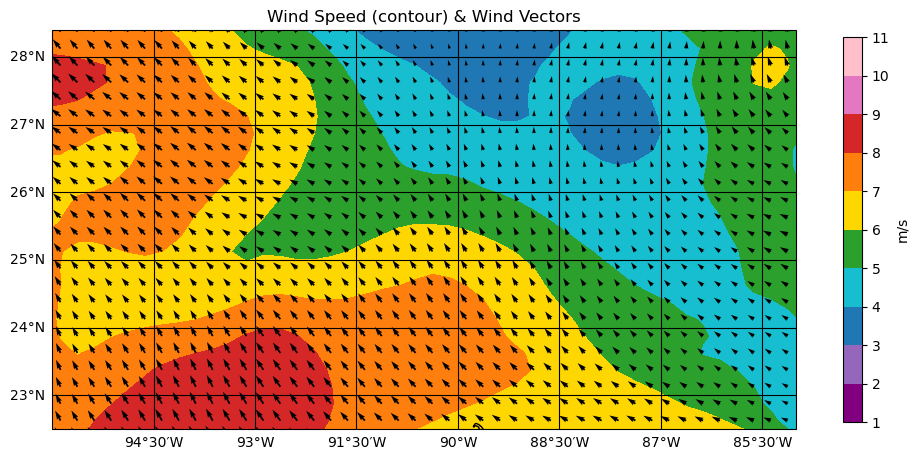

In [4]:
#Domain 3 
bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-96, -85, 22.5, 28.4], crs=mapcrs)
ax.coastlines()

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')

lat = ds.latitude.sel(latitude=slice(22,28.5))
lon = ds.longitude.sel(longitude=slice(263,285))
uwnd = ds.uwnd.isel(time=3).sel(latitude=slice(22,28.5), longitude=slice(263,285)).values
vwnd = ds.vwnd.isel(time=3).sel(latitude=slice(22,28.5), longitude=slice(263,285)).values
speed = np.sqrt(( uwnd**2 ) + ( vwnd**2) )

print(np.max(speed))
print(np.min(speed))
cs = ax.contourf(lon, lat, speed, levels = bounds,  colors = ['purple', 'tab:purple', 'tab:blue', 'tab:cyan', 'tab:green', 'gold', 'tab:orange', 'tab:red', 'tab:pink', 'pink'])

plt.quiver(lon, lat, uwnd, vwnd)
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = 'm/s')
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed (contour) & Wind Vectors')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/'
plt.savefig(save_results_to + 'CCMP_Winds.png', bbox_inches = 'tight',dpi = 150)
plt.show()


9.119987
1.1504813


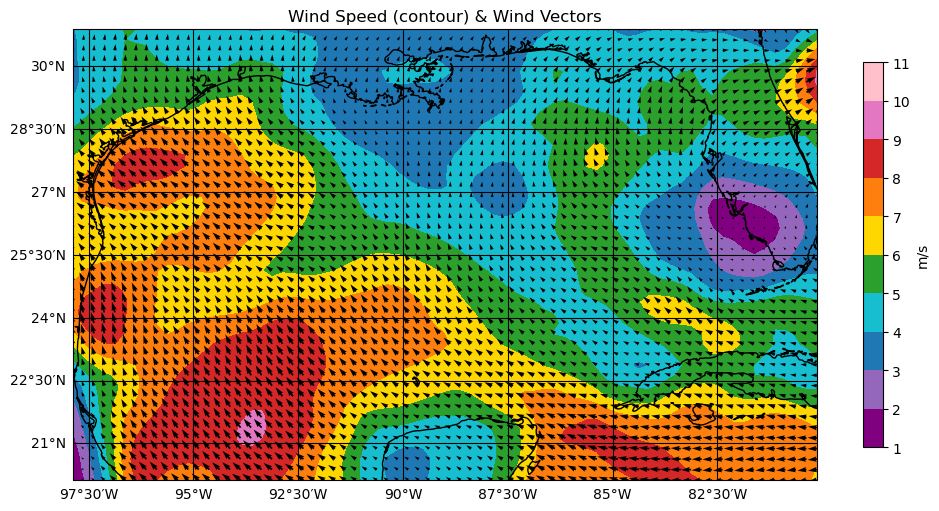

In [10]:
#GULF
bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection=mapcrs)
#ax.set_extent([-96, -85, 22.5, 28.4], crs=mapcrs)
ax.coastlines()

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')

lat = ds.latitude.sel(latitude=slice(20,31))
lon = ds.longitude.sel(longitude=slice(262,280))
uwnd = ds.uwnd.isel(time=3).sel(latitude=slice(20,31), longitude=slice(262,280)).values
vwnd = ds.vwnd.isel(time=3).sel(latitude=slice(20,31), longitude=slice(262,280)).values
speed = np.sqrt(( uwnd**2 ) + ( vwnd**2) )

print(np.max(speed))
print(np.min(speed))
cs = ax.contourf(lon, lat, speed, levels = bounds,  colors = ['purple', 'tab:purple', 'tab:blue', 'tab:cyan', 'tab:green', 'gold', 'tab:orange', 'tab:red', 'tab:pink', 'pink'])

plt.quiver(lon, lat, uwnd, vwnd)
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = 'm/s')
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed (contour) & Wind Vectors')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/'
plt.savefig(save_results_to + 'Gulf_CCMP_Winds.png', bbox_inches = 'tight',dpi = 150)
plt.show()


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


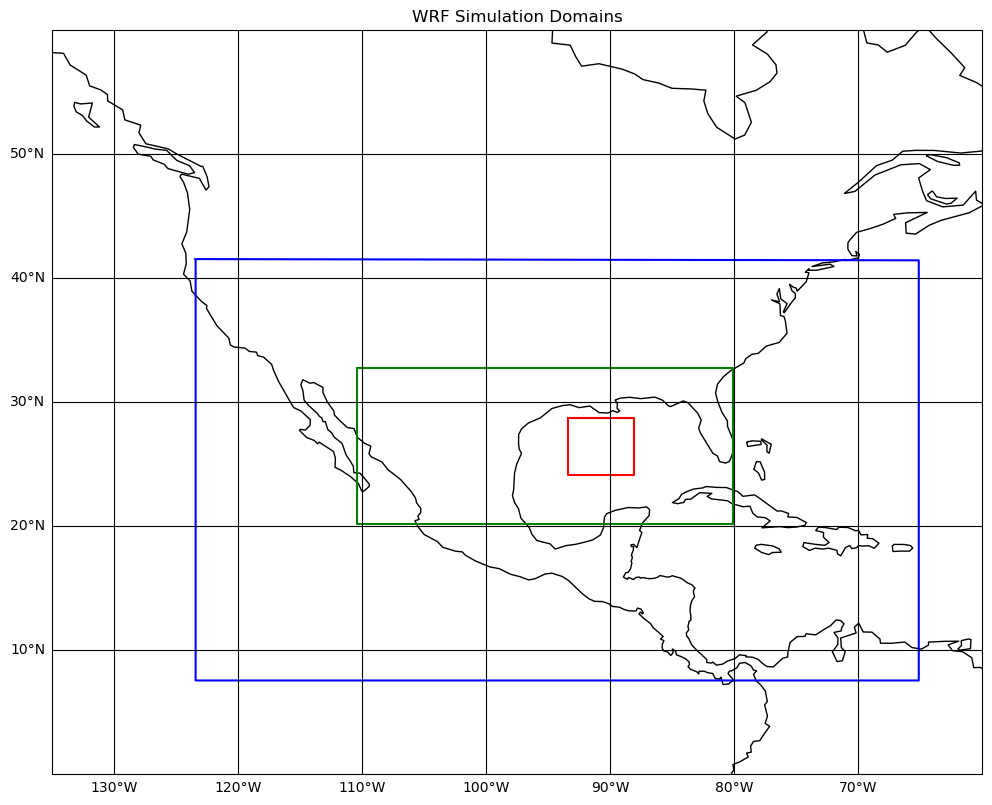

In [31]:
#Global Domains PLot

uwind = ds.uwnd.values
vwind = ds.vwnd.values
lat = ds.latitude.values
lon = ds.longitude.values

bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-135, -60, 0, 60], crs=mapcrs)
ax.coastlines()

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')

#lat = ds.latitude.sel(latitude=slice(20,31))
#lon = ds.longitude.sel(longitude=slice(262,280))
#uwnd = ds.uwnd.isel(time=3).sel(latitude=slice(20,31), longitude=slice(262,280)).values
#vwnd = ds.vwnd.isel(time=3).sel(latitude=slice(20,31), longitude=slice(262,280)).values
#speed = np.sqrt(( uwnd**2 ) + ( vwnd**2) )
cs = ax.contourf(lon, lat, uwind[2,:,:], levels = bounds,  colors = ['white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white'])
#plt.quiver(lon, lat, uwnd, vwnd)
#plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = 'm/s')
gl.top_labels = False
gl.ylabels_right = False

# Coordinates of rectangle vertices
# in clockwise order
xs = [-93.42328, -88.10474, -88.10474, -93.42328, -93.42328]
ys = [28.72953, 28.72953, 24.147293, 24.147293, 28.72953]
ax.plot(xs, ys, color="red") # domain 3 

xs = [-110.42328, -80.10474, -80.10474, -110.42328, -110.42328]
ys = [32.72953, 32.72953, 20.147293, 20.147293, 32.72953]
ax.plot(xs, ys, color="green") # domain 2

xs = [-123.42328, -65.10474, -65.10474, -123.42328, -123.42328]
ys = [41.52953, 41.42953, 7.547293, 7.547293, 41.52953]
ax.plot(xs, ys, color="blue") # domain 1 

plt.title('WRF Simulation Domains')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/'
plt.savefig(save_results_to + 'WRF_Domains.png', bbox_inches = 'tight',dpi = 150)
plt.show()


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


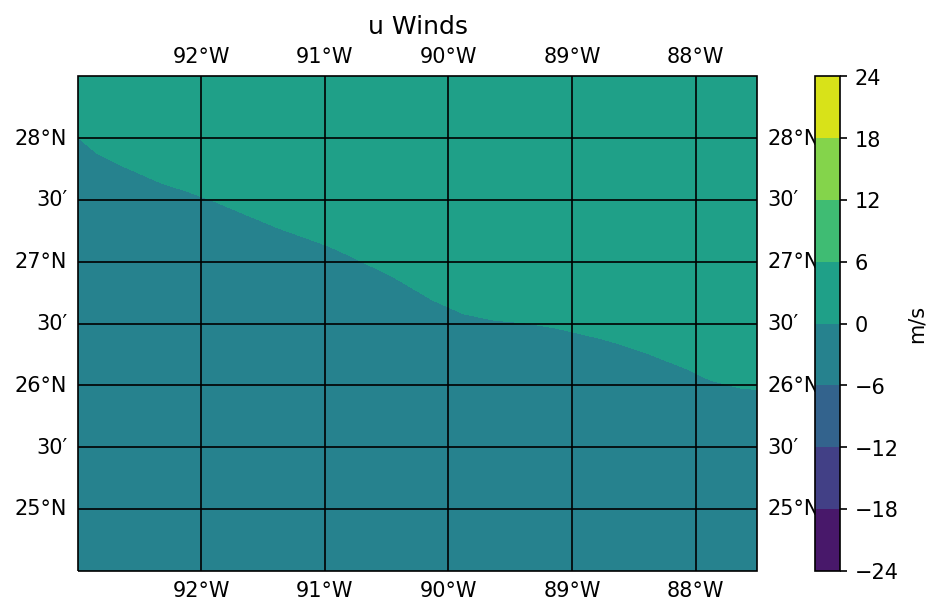

C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


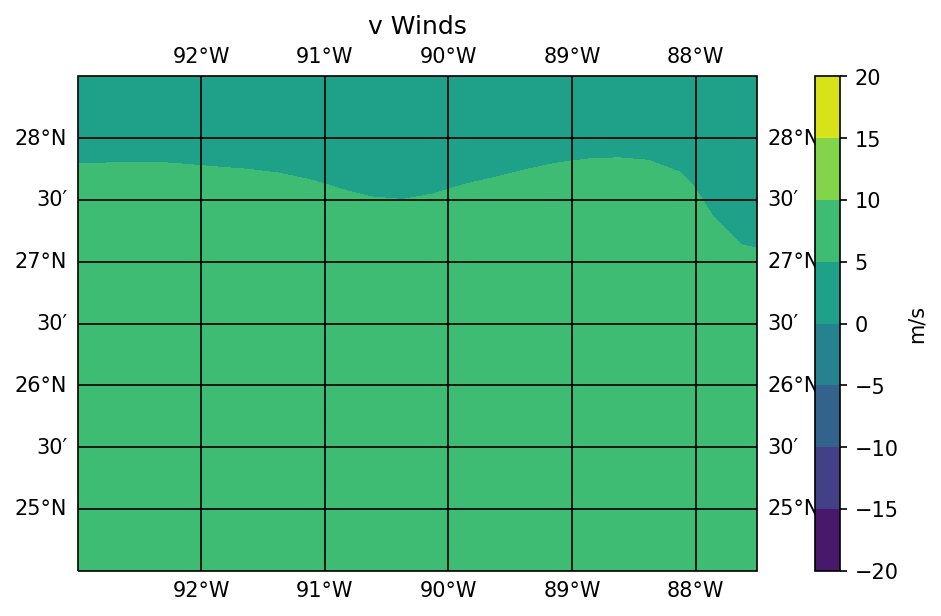

TypeError: Length of x (1440) must match number of columns in z (88)

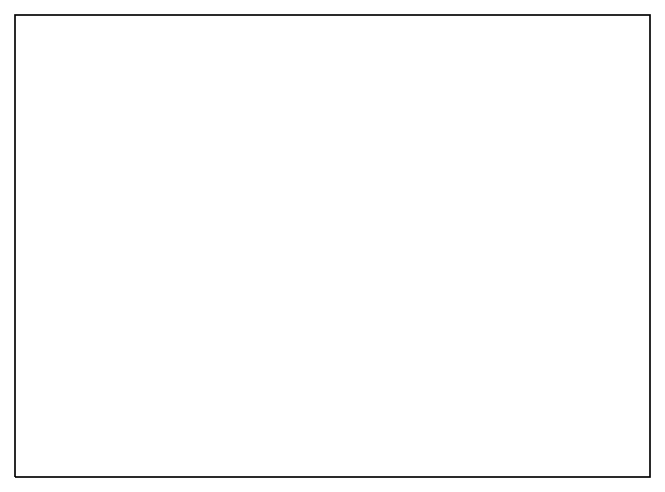

In [5]:
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5,28.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds.longitude.values, ds.latitude.values, ds.uwnd.values[2,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('u Winds')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + 'H25U_default.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5,28.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds.longitude.values, ds.latitude.values, ds.vwnd.values[2,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('v Winds')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + 'H25U_default.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-93, -87.5, 24.5,28.5], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds.longitude.values, ds.latitude.values, speed[:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + 'H25U_default.png',  bbox_inches = 'tight',dpi = 150)
plt.show()

In [ ]:
bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-96, -85, 22.5, 28.4], crs=mapcrs)
ax.coastlines()

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')

lat = ds.latitude.sel(latitude=slice(22,28.5))
lon = ds.longitude.sel(longitude=slice(263,285))
uwnd = ds.uwnd.isel(time=3).sel(latitude=slice(22,28.5), longitude=slice(263,285)).values
vwnd = ds.vwnd.isel(time=3).sel(latitude=slice(22,28.5), longitude=slice(263,285)).values
speed = np.sqrt(( uwnd**2 ) + ( vwnd**2) )

print(np.max(speed))
print(np.min(speed))
cs = ax.contourf(lon, lat, speed, levels = bounds,  colors = ['purple', 'tab:purple', 'tab:blue', 'tab:cyan', 'tab:green', 'gold', 'tab:orange', 'tab:red', 'tab:pink', 'pink'])

plt.quiver(lon, lat, uwnd, vwnd)
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = 'm/s')
gl.top_labels = False
gl.ylabels_right = False
plt.title('Wind Speed (contour) & Wind Vectors')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/'
plt.savefig(save_results_to + 'CCMP_Winds.png', bbox_inches = 'tight',dpi = 150)
plt.show()
